In [1]:
import cartopy.crs as ccrs
import cartopy
import datetime as dt
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import netCDF4
import numpy as np
import os

In [2]:
geom_file = '/glade/work/afox/jedi/Jedi_experiments/input/wrf_hydro_nwm_files/colorado/geometry_nwm_long_range_snow.nc'

print('\nOpening ', geom_file, 'for reading')
ncfile = netCDF4.Dataset(geom_file, mode='r')
# Get metadata from the file
npx = ncfile.dimensions["west_east"].size
npy = ncfile.dimensions["south_north"].size
npz = 1
lons = ncfile.variables["XLONG"][:]
lats = ncfile.variables["XLAT"][:]
# Print field dimensions
print(" Grid dimensions", npx, 'x', npy, 'x', npz)


Opening  /glade/work/afox/jedi/Jedi_experiments/input/wrf_hydro_nwm_files/colorado/geometry_nwm_long_range_snow.nc for reading
 Grid dimensions 487 x 493 x 1


In [3]:
fld = np.zeros((npy, npx))
fld[:,:] = ncfile.variables["HGT"][:,:]

In [14]:
levels = np.linspace(1200,4400,200)
cmap = 'terrain'

 Saving figure as ./figures/colorado_topo.png 



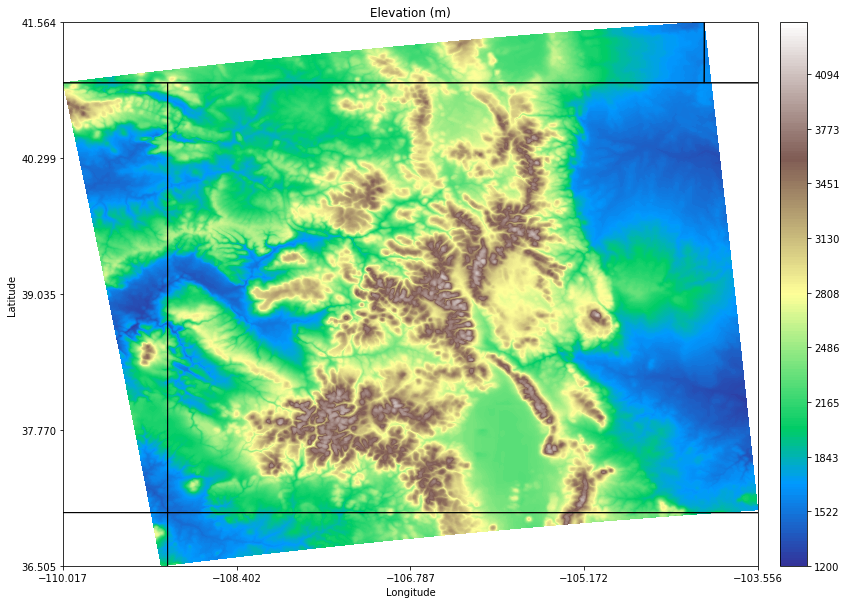

In [17]:
# Create two dimensional contour plot of HGT

# Set the projection
projection = ccrs.PlateCarree()

# Create figure to hold plot
fig = plt.figure(figsize=(20, 10))

# Just one subplot for now
ax = fig.add_subplot(1, 1, 1, projection=projection)

    # Contour the field
im = ax.contourf(lons, lats, fld,
                 transform=projection,
                 cmap=cmap,
                 levels=levels)

# Add coast lines to the plot
ax.coastlines()

ax.add_feature(cartopy.feature.STATES)

# Add labels to the plot
ax.set_xticks(np.linspace(np.min(lons), np.max(lons), 5), crs=projection)
ax.set_yticks(np.linspace(np.min(lats), np.max(lats), 5), crs=projection)

ax.set_xlabel("Longitude")
ax.set_ylabel('Latitude')
ax.set_title("Elevation (m)")
#ax.set_global()

# Add a colorbar for the filled contour.
# colorbar
cbar = plt.colorbar(im, ax=ax, pad=0.02, fraction=0.06,)

# show plot
savename = ('./figures/colorado_topo.png')
print(" Saving figure as", savename, "\n")
plt.savefig(savename, facecolor='w', dpi = 400)